In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!cp /content/drive/Shareddrives/Sam/Datasets/NH/images.npy .
!cp /content/drive/Shareddrives/Sam/Datasets/NH/controls.npy .
!cp /content/drive/Shareddrives/Sam/Datasets/NH/points.npy .
!cp /content/drive/Shareddrives/Sam/Datasets/NH/labels.npy .

In [ ]:
images = np.load('images.npy')
controls = np.load('controls.npy')
points = np.load('points.npy')
labels = np.load('labels.npy')

In [ ]:
images.shape, controls.shape, points.shape, labels.shape

((34437, 70, 254, 3), (34437, 4), (34437, 20), (34437, 3))

In [ ]:
indx = 480
image, ctrls, pts, lbl = images[indx], controls[indx], points[indx], labels[indx]

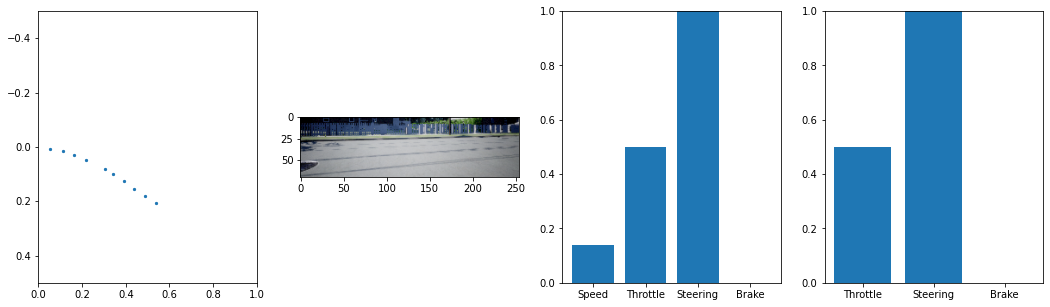

In [ ]:
fig, (pt_ax, im_ax, ctrl_ax, lbl_ax) = plt.subplots(1, 4, figsize=(18, 5))
pt_ax.scatter(pts[::2], pts[1::2], s=5)
pt_ax.set_xlim(0, 1)
pt_ax.set_ylim(0.5, -0.5)

im_ax.imshow(image)
  
fields = ['Speed', 'Throttle', 'Steering', 'Brake']
ctrl_ax.bar(fields, ctrls)
ctrl_ax.set_ylim(0, 1)

lbl_ax.bar(fields[1:], lbl)
lbl_ax.set_ylim(0, 1)

plt.show()

In [ ]:
size = images.shape[0]
mask = np.zeros((size,), dtype=bool)
np.random.seed(0)
indx = np.random.choice(size, size//6)
mask[indx] = True

In [ ]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 128

def normalize_image(image, control, point, label):
  return tf.cast(image, tf.float32) / 255., control, point, label

test_dataset = tf.data.Dataset.from_tensor_slices((
    images[mask], controls[mask], points[mask], labels[mask]))\
    .map(normalize_image)\
    .shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
    
train_dataset = tf.data.Dataset.from_tensor_slices((
    images[~mask], controls[~mask], points[~mask], labels[~mask]))\
    .map(normalize_image)\
    .shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
len(train_dataset), len(test_dataset)

(228, 42)

In [ ]:
# class Model(tf.keras.Model):

#   def __init__(self):
#     super().__init__()
#     self.input_img = None
#     self.conv1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
#     self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)
#     self.dropout = tf.keras.layers.Dropout(0.5)

#   def call(self, inputs, training=False):
#     x = self.dense1(inputs)
#     if training:
#       x = self.dropout(x, training=training)
#     return self.dense2(x)

# model = MyModel()

Model 1

In [ ]:
# input_img = tf.keras.Input(shape=(70, 254, 3))

# conv1 = tf.keras.layers.Conv2D(32, (5,5), strides=(1,1), padding='valid')
# b1 = tf.keras.layers.BatchNormalization()
# d1 = tf.keras.layers.Dropout(0.5)
# a1 = tf.keras.layers.ReLU()
# max1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')

# conv2 = tf.keras.layers.Conv2D(64, (3,3), strides=(1,1), padding='valid')
# b2 = tf.keras.layers.BatchNormalization()
# d2 = tf.keras.layers.Dropout(0.5)
# a2 = tf.keras.layers.ReLU()
# max2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')

# conv3 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='valid')
# b3 = tf.keras.layers.BatchNormalization()
# d3 = tf.keras.layers.Dropout(0.5)
# a3 = tf.keras.layers.ReLU()
# max3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')

# conv4 = tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), padding='valid')
# b4 = tf.keras.layers.BatchNormalization()
# d4 = tf.keras.layers.Dropout(0.5)
# a4 = tf.keras.layers.ReLU()
# max4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')

# img_stack = tf.keras.layers.Flatten()

# dense_img1 = tf.keras.layers.Dense(512, activation='relu')
# dense_img2 = tf.keras.layers.Dense(256, activation='relu')

# input_ctrl = tf.keras.Input(shape=(4,))
# dense_ctrl1 = tf.keras.layers.Dense(32, activation='relu')
# dense_ctrl2 = tf.keras.layers.Dense(64, activation='relu')


# input_pts = tf.keras.Input(shape=(20,))
# dense_pts1 = tf.keras.layers.Dense(64, activation='relu')
# dense_pts2 = tf.keras.layers.Dense(128, activation='relu')

# merge = tf.keras.layers.Concatenate()

# dense_merge1 = tf.keras.layers.Dense(128, activation='relu')
# dense_merge2 = tf.keras.layers.Dense(32, activation='relu')
# dense_merge3 = tf.keras.layers.Dense(3, activation='relu')

# # dropout = tf.keras.layers.Dropout(0.5)

In [ ]:
# x_img = conv1(input_img)
# x_img = b1(x_img)
# x_img = a1(x_img)
# x_img = max1(x_img)

# x_img = conv2(x_img)
# x_img = b2(x_img)
# x_img = a2(x_img)
# x_img = max2(x_img)

# x_img = conv3(x_img)
# x_img = b3(x_img)
# x_img = a3(x_img)
# x_img = max3(x_img)

# x_img = conv4(x_img)
# x_img = b4(x_img)
# x_img = a4(x_img)
# x_img = max4(x_img)

# x_img = img_stack(x_img)

# x_img = dense_img1(x_img)
# x_img = dense_img2(x_img)

# x_ctrl = dense_ctrl1(input_ctrl)
# x_ctrl = dense_ctrl2(x_ctrl)

# x_pts = dense_pts1(input_pts)
# x_pts = dense_pts2(x_pts)

# x = merge([x_img, x_ctrl, x_pts])

# x = dense_merge1(x)
# x = dense_merge2(x)
# x = dense_merge3(x)
# x = tf.keras.activations.sigmoid(x)

# model = tf.keras.Model([input_img, input_ctrl, input_pts], x)
# opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
# model.compile(optimizer=opt, loss='mse')

Model 2

In [ ]:
# activation = 'relu'
# input_img = tf.keras.Input(shape=(70, 254, 3))

# img_stack = tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation=activation)(input_img)
# img_stack = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(img_stack)
# img_stack = tf.keras.layers.Conv2D(32, (3, 3), activation=activation, padding='same')(img_stack)
# img_stack = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(img_stack)
# img_stack = tf.keras.layers.Conv2D(32, (3, 3), activation=activation, padding='same')(img_stack)
# img_stack = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(img_stack)
# img_stack = tf.keras.layers.Flatten()(img_stack)
# img_stack = tf.keras.layers.Dropout(0.2)(img_stack)

# ###############
# input_pts = tf.keras.Input(shape=(20,))
# dense_pts1 = tf.keras.layers.Dense(16, activation='relu')(input_pts)
# dense_pts2 = tf.keras.layers.Dense(16, activation='relu')(dense_pts1)

# #Inject the state input
# input_ctrl = tf.keras.Input(shape=(4,))
# merged = tf.keras.layers.concatenate([img_stack, input_ctrl, dense_pts2])

# # Add a few dense layers to finish the model
# merged = tf.keras.layers.Dense(64, activation=activation)(merged)
# merged = tf.keras.layers.Dropout(0.2)(merged)
# merged = tf.keras.layers.Dense(10, activation=activation)(merged)
# merged = tf.keras.layers.Dropout(0.2)(merged)
# merged = tf.keras.layers.Dense(3, name='output')(merged)

# adam = tf.keras.optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# model = tf.keras.Model(inputs=[input_img, input_ctrl, input_pts], outputs=merged)
# model.compile(optimizer=adam, loss='mse')

In [ ]:
# model.summary()

In [ ]:
# dot_img_file = './model_1.png'
# tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

model 3 VGG-based


In [ ]:
# activation = 'relu'
# input_img = tf.keras.Input(shape=(70, 254, 3))

# img_stack = tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation=activation)(input_img) #32 from start, 5*5 kernel
# img_stack = tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation=activation)(input_img)
# img_stack = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(img_stack)

# img_stack = tf.keras.layers.Conv2D(32, (3, 3), activation=activation, padding='same')(img_stack)
# img_stack = tf.keras.layers.Conv2D(32, (3, 3), activation=activation, padding='same')(img_stack)
# img_stack = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(img_stack)

# img_stack = tf.keras.layers.Conv2D(64, (3, 3), activation=activation, padding='same')(img_stack)
# img_stack = tf.keras.layers.Conv2D(64, (3, 3), activation=activation, padding='same')(img_stack)
# img_stack = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(img_stack)

# img_stack = tf.keras.layers.Conv2D(128, (3, 3), activation=activation, padding='same')(img_stack)
# img_stack = tf.keras.layers.Conv2D(128, (3, 3), activation=activation, padding='same')(img_stack)
# img_stack = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(img_stack)

# img_stack = tf.keras.layers.Flatten()(img_stack)
# img_stack = tf.keras.layers.Dropout(0.2)(img_stack)

# dense_img1 = tf.keras.layers.Dense(1024, activation='relu')(img_stack)
# dense_img1 = tf.keras.layers.Dropout(0.2)(dense_img1)
# dense_img2 = tf.keras.layers.Dense(512, activation='relu')(dense_img1)
# dense_img2 = tf.keras.layers.Dropout(0.2)(dense_img2)


# ######################################
# input_pts = tf.keras.Input(shape=(20,))
# dense_pts1 = tf.keras.layers.Dense(32, activation='relu')(input_pts) # 64 , 32 , 16
# dense_pts2 = tf.keras.layers.Dense(32, activation='relu')(dense_pts1)

# ######################################
# input_ctrl = tf.keras.Input(shape=(4,))
# merged = tf.keras.layers.concatenate([dense_img2, input_ctrl, dense_pts2])

# # Add a few dense layers to finish the model
# merged = tf.keras.layers.Dense(200, activation=activation)(merged)
# merged = tf.keras.layers.Dropout(0.2)(merged)
# merged = tf.keras.layers.Dense(64, activation=activation)(merged)
# merged = tf.keras.layers.Dropout(0.2)(merged)
# merged = tf.keras.layers.Dense(3, name='output')(merged)

# adam = tf.keras.optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# model3 = tf.keras.Model(inputs=[input_img, input_ctrl, input_pts], outputs=merged)
# model3.compile(optimizer=adam, loss='mse')

In [ ]:
# model3.summary()

Model 4

In [ ]:
# 0 - no dropout & no bn
# 1 - bn before activation layer + dropout after maxpool
# 2 - bn after each layer's activation + dropout after maxpool
# 3 - bn before maxpool + dropout after maxpool
# 4 - only dropout

def conv2d_block(x, n_layer=2, n_channel=16, kernel=(3,3), t=1):
    for i in range(n_layer):
        x = tf.keras.layers.Conv2D(n_channel, kernel, padding='same')(x)
        if t == 1:
            x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)
        if t == 2:
            x = tf.keras.layers.BatchNormalization()(x)
    if t == 3:
        x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    if t != 0:
        x = tf.keras.layers.Dropout(0.5)(x)
    return x

In [ ]:
# 0 - no dropout
# 1 - dropout after activation layer

def fc_block(x, size, t=1):
    x = tf.keras.layers.Dense(size)(x)
    x = tf.keras.layers.Activation('relu')(x)
    if t != 0:
        x = tf.keras.layers.Dropout(0.2)(x)
    return x

In [ ]:
input_img = tf.keras.Input(shape=(70, 254, 3))

img_stack = conv2d_block(input_img, 2, 16, (3,3), t=1)
img_stack = conv2d_block(img_stack, 2, 32, (3,3), t=1)
img_stack = conv2d_block(img_stack, 2, 64, (3,3), t=1)
img_stack = conv2d_block(img_stack, 2, 128, (3,3), t=1)

img_stack = tf.keras.layers.Flatten()(img_stack)
img_stack = tf.keras.layers.Dropout(0.2)(img_stack)

dense_img = fc_block(img_stack, 1024)
dense_img = fc_block(dense_img, 512)


######################################
input_pts = tf.keras.Input(shape=(20,))
dense_pts = fc_block(input_pts, 32)
dense_pts = fc_block(dense_pts, 32)

######################################
input_ctrl = tf.keras.Input(shape=(4,))
dense_ctrl = fc_block(input_ctrl, 8)
dense_ctrl = fc_block(dense_ctrl, 16)###############
merged = tf.keras.layers.concatenate([dense_img, dense_ctrl, dense_pts])

# Add a few dense layers to finish the model
merged = fc_block(merged, 200)
merged = fc_block(merged, 64)
merged = tf.keras.layers.Dense(3, name='output')(merged)
### sigmoid layer

adam = tf.keras.optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model4 = tf.keras.Model(inputs=[input_img, input_ctrl, input_pts], outputs=merged)
model4.compile(optimizer=adam, loss='mse')

In [ ]:
model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 70, 254, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 70, 254, 16)  448         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 70, 254, 16)  64         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
!mkdir saved_model

In [ ]:
epochs = 500
train_loss_values = np.zeros((epochs,))
test_loss_values = np.zeros((epochs,))

for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    loss = 0
    for step, (imgs, ctrls, pts, lbls) in enumerate(train_dataset):
        loss = model4.train_on_batch([imgs, ctrls, pts], lbls)
        train_loss_values[epoch] += loss
        if step % 10 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss))
            )
            print("Seen so far: %s samples" % ((step + 1) * BATCH_SIZE))

    for step, (imgs, ctrls, pts, lbls) in enumerate(test_dataset):
        loss = model4.test_on_batch([imgs, ctrls, pts], lbls)
        test_loss_values[epoch] += loss

    if epoch % 10 == 9:
        model4.save('./saved_model/model-' + str(epoch))
    print("\nLoss: %f, Train Loss: %f" % (train_loss_values[epoch], test_loss_values[epoch]))

Streaming output truncated to the last 5000 lines.
Training loss (for one batch) at step 40: 0.0124
Seen so far: 5248 samples
Training loss (for one batch) at step 50: 0.0122
Seen so far: 6528 samples
Training loss (for one batch) at step 60: 0.0083
Seen so far: 7808 samples
Training loss (for one batch) at step 70: 0.0151
Seen so far: 9088 samples
Training loss (for one batch) at step 80: 0.0234
Seen so far: 10368 samples
Training loss (for one batch) at step 90: 0.0084
Seen so far: 11648 samples
Training loss (for one batch) at step 100: 0.0101
Seen so far: 12928 samples
Training loss (for one batch) at step 110: 0.0060
Seen so far: 14208 samples
Training loss (for one batch) at step 120: 0.0077
Seen so far: 15488 samples
Training loss (for one batch) at step 130: 0.0101
Seen so far: 16768 samples
Training loss (for one batch) at step 140: 0.0112
Seen so far: 18048 samples
Training loss (for one batch) at step 150: 0.0058
Seen so far: 19328 samples
Training loss (for one batch) at st

In [ ]:
!cp -r ./saved_model /content/drive/Shareddrives/Sam/

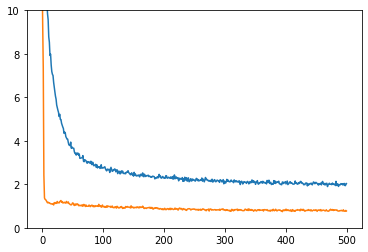

In [ ]:
plt.plot(train_loss_values)
plt.plot(test_loss_values)
plt.ylim(0, 10)
plt.show()